Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

import pydataset
from pydataset import data


# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
import sklearn.preprocessing

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph

### 1. Load the tips dataset from either pydataset or seaborn.


In [2]:
pydataset.data('tips', show_doc=True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [3]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#get rid of columns
columns_to_drop = {'sex', 'smoker', 'day', 'time', 'size'}
tips = tips.drop(columns=columns_to_drop)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.


In [5]:
# from sklearn.linear_model import LinearRegression

# # assuming X and y are already defined
# model = LinearRegression().fit(X, y)
# predictions = model.predict(X)

# #Modify and add to the code above as necessary for it to work with the tips dataset.

In [6]:
from sklearn.linear_model import LinearRegression

#use above code define our X & Y
model = LinearRegression().fit(tips[['total_bill']], tips[['tip']])
predictions = model.predict(tips[['total_bill']])

In [7]:
tips['yhat'] = predictions
tips.head()

,total_bill,tip,yhat
1,16.99,1.01,2.704636
2,10.34,1.66,2.006223
3,21.01,3.50,3.126835
4,23.68,3.31,3.407250
5,24.59,3.61,3.502822


In [8]:
tips['yhat_baseline'] = tips['tip'].mean()


In [9]:
tips.head()

,total_bill,tip,yhat,yhat_baseline
1,16.99,1.01,2.704636,2.998279
2,10.34,1.66,2.006223,2.998279
3,21.01,3.50,3.126835,2.998279
4,23.68,3.31,3.407250,2.998279
5,24.59,3.61,3.502822,2.998279


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

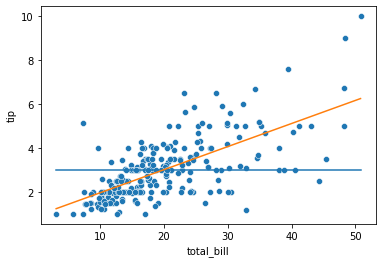

In [52]:
#ravinders

sns.scatterplot(x = 'total_bill', y='tip', data = tips)
sns.lineplot(x='total_bill', y='yhat_baseline', data = tips)
sns.lineplot(x='total_bill', y='yhat', data=tips)

### 3. Plot the residuals for the linear regression model that you made.



In [11]:
tips['residual'] = (tips['yhat'] - tips['tip'])
tips['residual_baseline'] = (tips['yhat_baseline'] - tips['tip'])
tips.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279
2,10.34,1.66,2.006223,2.998279,0.346223,1.338279
3,21.01,3.50,3.126835,2.998279,-0.373165,-0.501721
4,23.68,3.31,3.407250,2.998279,0.097250,-0.311721
5,24.59,3.61,3.502822,2.998279,-0.107178,-0.611721


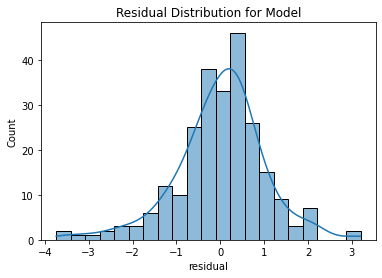

In [12]:
# KDE represents the data using a continuous probability 
# density curve in one or more dimensions.

sns.histplot(x = 'residual', data = tips, kde=True)
plt.title('Residual Distribution for Model')
plt.show()

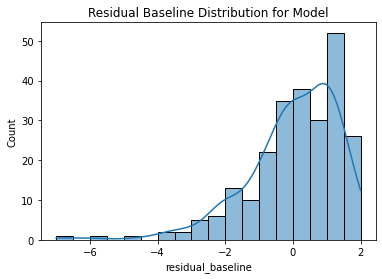

In [13]:
sns.histplot(x = 'residual_baseline', data = tips, kde=True)
plt.title('Residual Baseline Distribution for Model')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [14]:
# SSE squaring each of the errors and summing
# ESS sum of squares
# MSE (mean squared) - divide SSE by data points
# TSE = tss + sse
# RMSE (root mean square error) squareroot of MSE

In [15]:
tips['residual^2'] = tips['residual'] ** 2
tips['residual_baseline^2'] = tips['residual_baseline'] ** 2
tips.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
1,16.99,1.01,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724
4,23.68,3.31,3.407250,2.998279,0.097250,-0.311721,0.009458,0.097170
5,24.59,3.61,3.502822,2.998279,-0.107178,-0.611721,0.011487,0.374203


In [16]:
# SSE
SSE = sum(tips['residual^2'])
SSE_baseline = sum(tips['residual_baseline^2'])

print(f'SSE = {SSE :.3f}')

print(f'SSE_baseline = {SSE_baseline :.3f}')

SSE = 252.789
SSE_baseline = 465.212


In [17]:
#ESS explained sum of squares
ESS = sum((tips.yhat - tips['tip'].mean()) ** 2)
print (f'ESS = {ESS:.3f}')

ESS = 212.424


In [18]:
#TSS 
TSS = ESS + SSE
print(f'TSS = {TSS:.3f}')

TSS = 465.212


In [19]:
#MSE
len(tips)

244

In [20]:
MSE = SSE / (len(tips))
print(f'MSE = {MSE:.3f}')

MSE = 1.036


In [21]:
# RMSE  - sqrt(mse)
RMSE = sqrt(MSE)
print(f'RMSE = {RMSE:3f}')

RMSE = 1.017850


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [22]:
#SSE Baseline
SSE_baseline = sum(tips['residual_baseline^2'])
print(f'SSE_baseline = {SSE_baseline :.3f}')

SSE_baseline = 465.212


In [23]:
#MSE Baseline
MSE_baseline = SSE_baseline/(len(tips))
print(f'MSE_baseline = {MSE_baseline :3f}')

MSE_baseline = 1.906609


In [24]:
#RMSE
RMSE_baseline = sqrt(MSE_baseline)
print(f'RMSE_baseline = {RMSE_baseline :3f}')

RMSE_baseline = 1.380800


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [25]:
print(f'SSE = {SSE :.3f}')

print(f'SSE_baseline = {SSE_baseline :.3f}')

print(f'Difference between SSE & SSE_baseline = {SSE - SSE_baseline :.3f}')

SSE = 252.789
SSE_baseline = 465.212
Difference between SSE & SSE_baseline = -212.424


In [50]:
if (SSE < SSE_baseline):
    print('Model performs better than baseline model')
else:
    print('Baseline performs better than model')

Model performs better than baseline model


In [53]:
# look at R's code in regards to showing the results as a dataframe

df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


### 7. What is the amount of variance explained in your model?

In [27]:
R2 = ESS / TSS
print(f'R-Squared = {R2:.3f}')
print("Percent of variance in y explained by x = ", round(R2 * 100,1), "%")

R-Squared = 0.457
Percent of variance in y explained by x =  45.7 %


### 8. Is your model better than the baseline model?

- Yes it is better in the baseline as proven in question 6

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)

- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

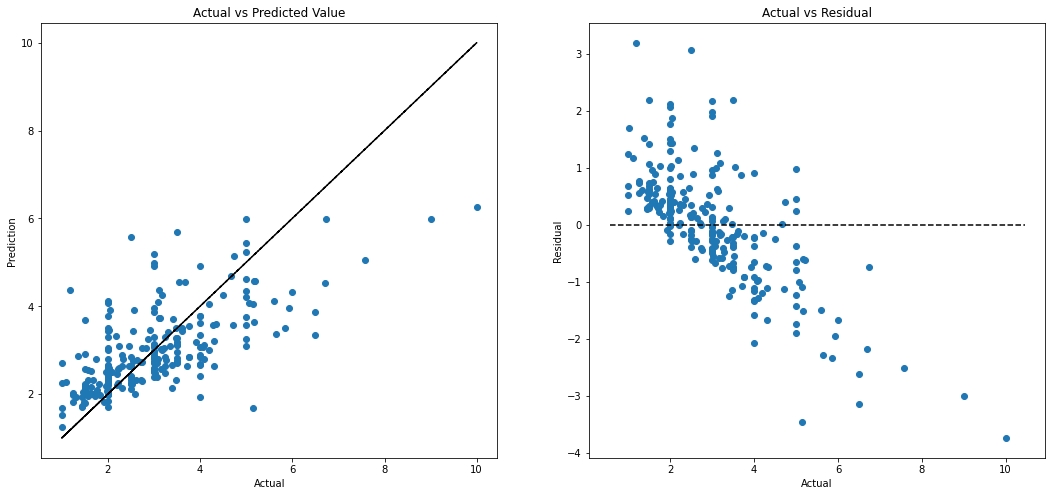

In [28]:
#plot residuals
plt.figure(figsize=(18,8))
ax = plt.subplot(1, 2, 1)
ax.scatter(tips['tip'], tips['yhat'], label = 'predicted')
ax.set(title = 'Actual vs Predicted Value', ylabel = 'Prediction', xlabel = 'Actual')
ax.plot(tips['tip'], tips['tip'], ls='--', c = 'black')

ax = plt.subplot(1,2,2)
ax.scatter(tips['tip'], tips['residual'])
ax.set(title = 'Actual vs Residual', ylabel = 'Residual', xlabel = 'Actual')
ax.hlines(0, *ax.get_xlim(), ls = '--', color = 'black')


In [29]:
def plot_residual(actuals, predictions, residual):
    plt.figure(figsize=(18,8))
    ax = plt.subplot(1, 2, 1)
    ax.scatter(actuals, predictions, label = 'predicted')
    ax.set(title = 'Actual vs Predicted Value', ylabel = 'Prediction', xlabel = 'Actual')
    ax.plot(actuals, actuals, ls='--', c = 'black')

    ax = plt.subplot(1,2,2)
    ax.scatter(actuals, residual)
    ax.set(title = 'Actual vs Residual', ylabel = 'Residual', xlabel = 'Actual')
    ax.hlines(0, *ax.get_xlim(), ls = '--', color = 'black')
    

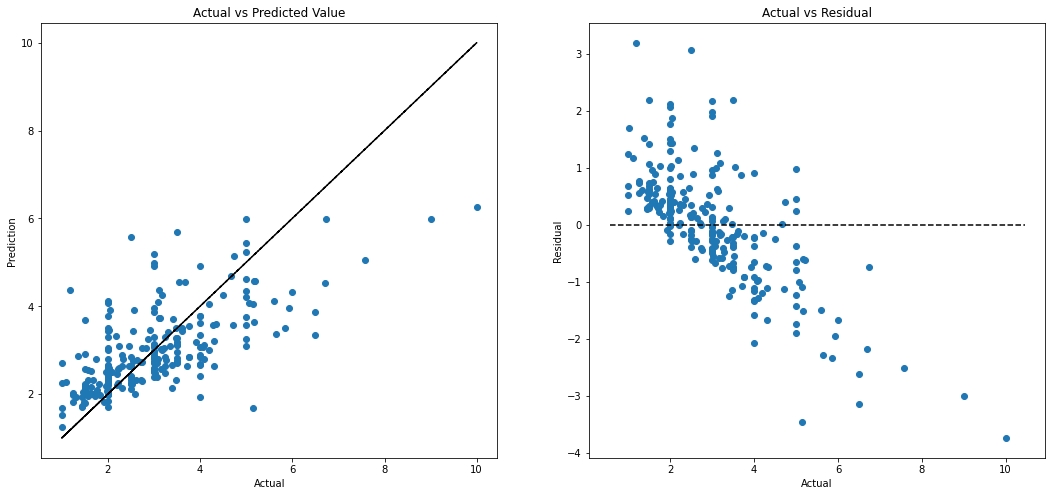

In [30]:
plot_residual(tips['tip'], tips['yhat'], tips['residual'])

In [31]:
#regression errors:
def regression_errors(y, yhat, print_out = False):
    
    #calculate sume of squared error
    SSE = ((y - yhat) ** 2).sum()
    
    #calc Mean of squared error
    MSE = SSE / (y.shape[0])
    
    #calc Root of mean squared
    RMSE = sqrt(MSE)
    
    #calc explained sum of squares
    ESS = sum((yhat - y.mean()) ** 2)
    
    #calc total sum of squares
    TSS = sum((y - y.mean()) ** 2)

    if print_out == True:
        print(f'''
        The Sum of Squared Error = {SSE: .2f}
        The Mean of Squared Error = {MSE:.2f}
        The Root Mean Squared Error = {RMSE:.2f}
        The Mean Explained Sum of Squares = {ESS:.2f}
        The Total Sum of Squares = {TSS:.2f}''')
    return SSE, MSE, RMSE, ESS, TSS

In [32]:
#baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

def baseline_mean_errors(y):
    baseline = y.mean()
    
    #SSE
    SSE = ((y - baseline) **2).sum()
    
    #MSE
    MSE = SSE / (y.shape[0])
    
    #RMSE
    RMSE = sqrt(MSE)
    
    return SSE, MSE, RMSE

In [33]:
def better_than_baseline(y, yhat):
    '''
    Compares actuals(y) and predictions (yhat) and returns
    what performs better
    '''
    
    #calc baseline function
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    #calc actual values
    SSE, MSE, RMSE, ESS, TSS = regression_errors(y, yhat)
    
    if RMSE < RMSE_baseline:
        return True 
        print('Model beats baseline')
    else:
        return False 
        print('Baseline beats model')

In [34]:
#Ran baseline as y.mode() and was true for y.mean()
better_than_baseline(tips.tip, tips.yhat)

True

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [35]:
mpg = data('mpg')

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [37]:
#hwy mileage based on engine displacement

In [38]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [39]:
x = mpg['displ']
y = mpg['hwy']

In [40]:
baseline = y.mean()
mpg['baseline'] = y.mean()

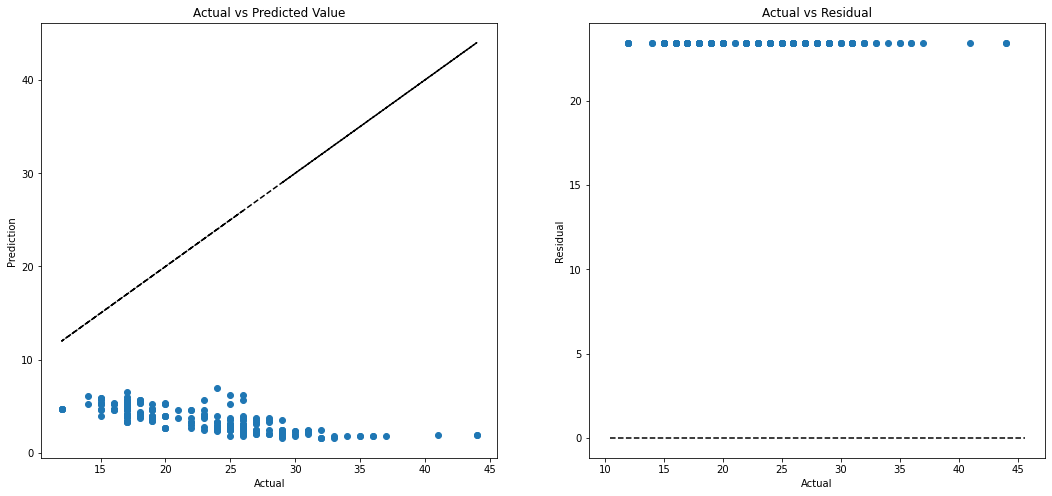

In [41]:
#something is wrong here

plot_residual(mpg['hwy'], mpg['displ'], mpg['baseline'])

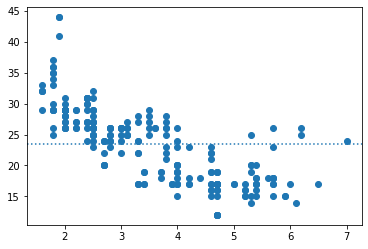

In [42]:
plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')
plt.ylabel=('hwy Mileage')
plt.xlabel=('Engine Displacement')
plt.title=('Baseline Model')
plt.show();

In [43]:
model = LinearRegression(normalize=True)

In [44]:
model.fit(mpg[['displ']],y)

LinearRegression(normalize=True)

In [45]:
mpg['yhat'] = model.predict(mpg[['displ']])

In [46]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002


In [47]:
mpg['residual'] = y - mpg['yhat']
mpg['baseline_residual'] = y - mpg['baseline']

In [48]:
#SSE MSE RSE

#see why your MSE does not match Ravinder's

baseline_mean_errors(y)

(8261.66239316239, 35.30624954342902, 5.941906221359356)

In [49]:
better_than_baseline(y, mpg['yhat'])

True